In [1]:
import random
import matplotlib.pyplot as plt
import time
import numpy as np
random.seed(42)

Realizamos dos graficos para medir la complejidad termporal de nuestro algoritmo.

In [2]:
def obtener_tiempos(path):
    with open(path, "r") as archivo:
        lineas = archivo.readlines()

    tiempos = []
    i = 0

    for linea in lineas:
        if (i == 0):
            i += 1
            continue
        valores = linea.strip().split(',')
        tupla = (int(valores[0]), int(valores[1]))
        tiempos.append(tupla)

    return tiempos

def obtener_ganancias_y_energias(path):
    with open(path, "r") as archivo:
        lineas = archivo.readlines()

    ganancias_e_i = []
    energias_s_i = []
    i = 0
    cantidad_elementos = 0

    for linea in lineas:
      if i == 0:
        cantidad_elementos = int(linea)
      else:
        if i <= cantidad_elementos:
          ganancias_e_i.append(int(linea))
        else:
          energias_s_i.append(int(linea))
      i += 1
      
    return ganancias_e_i, energias_s_i

def tiempos_a_graficar(tiempos):
  tamaños = []
  duracion = []
  for i, tupla in enumerate(tiempos):
    tamaños.append(i+1)

    inicio = time.time()
    tiempos_aux = tiempos[:i+1]
    tiempos_ordenados = ordenar_tupla(sort_by_ai, tiempos_aux[:i+1], True)
    resultado = tiempo_total(tiempos_ordenados[:i+1])

    fin = time.time()

    print(i)
    duracion.append(fin - inicio)

  return tamaños, duracion


sort_by_ai = lambda x: x[1]

In [ ]:
tamaños, duracion = tiempos_a_graficar(tiempos)

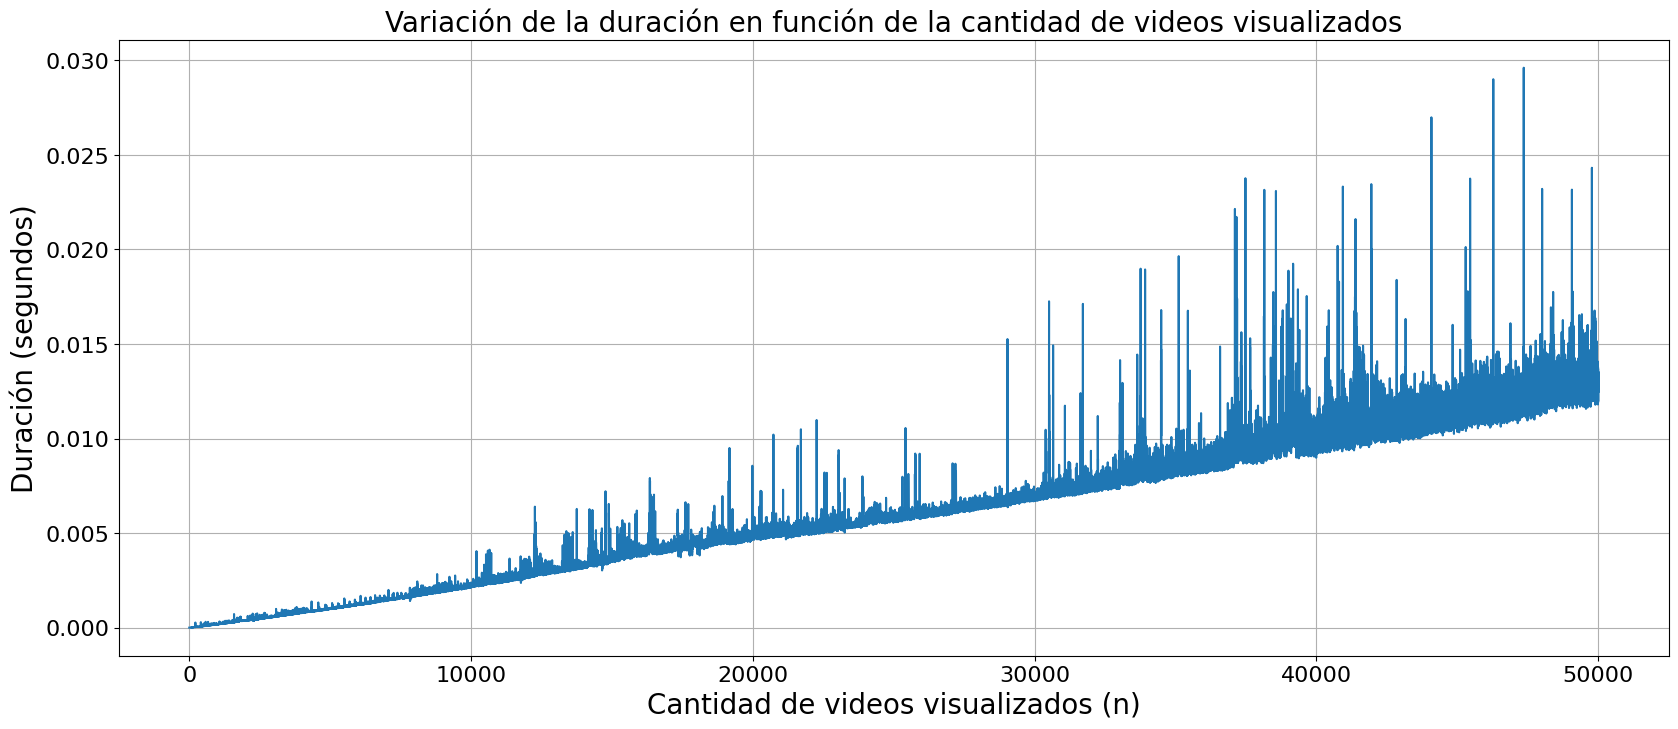

In [8]:
# Crear el gráfico
plt.figure(figsize=(20, 8))
plt.plot(tamaños, duracion)
plt.xlabel('Cantidad de videos visualizados (n)', fontsize=20)
plt.ylabel('Duración (segundos)', fontsize=20)
plt.title('Variación de la duración en función de la cantidad de videos visualizados', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Mostrar el gráfico
plt.show()

Graficamos contra la curva n*log(n)

/tmp/ipykernel_43692/1889881517.py:3: RuntimeWarning: invalid value encountered in log10
  y = x * np.log10(x)


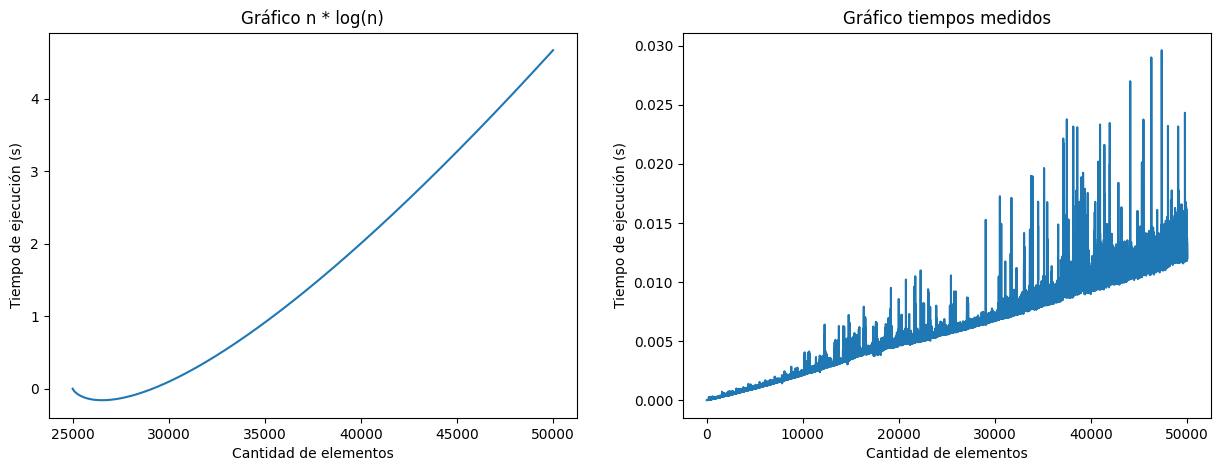

In [9]:
x = np.linspace(-6, 6, 50000)

y = x * np.log10(x)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("Gráfico n * log(n)")
ax[0].plot(tamaños, y)

ax[0].set_xlabel('Cantidad de elementos')
ax[0].set_ylabel('Tiempo de ejecución (s)')

ax[1].set_title("Gráfico tiempos medidos")

ax[1].set_xlabel('Cantidad de elementos')
ax[1].set_ylabel('Tiempo de ejecución (s)')
plt.plot(tamaños, duracion, label='Algoritmo de Scaloni')
plt.show()

# Comparacion dos sets de datos

In [12]:
# Creación archivos
with open('sets/nuestros/set_grafico_ayudantes_lentos.txt', 'w') as archivo:
  archivo.write('S_i,A_i\n')
  for i in range(0,20000):
    si = random.randint(1, 10)
    ai = random.randint(200, 300)
    archivo.write(str(si) + ',' + str(ai) + '\n')

with open('sets/nuestros/set_grafico_ayudantes_rapidos.txt', 'w') as archivo:
  archivo.write('S_i,A_i\n')
  for i in range(0,20000):
    si = random.randint(1, 10)
    ai = random.randint(1, 10)
    archivo.write(str(si) + ',' + str(ai) + '\n')


In [ ]:
tiempos4 = obtener_tiempos('sets/nuestros/set_grafico_ayudantes_lentos.txt')
tamaños4, duracion4 = tiempos_a_graficar(tiempos4)

tiempos5 = obtener_tiempos('sets/nuestros/set_grafico_ayudantes_rapidos.txt')
tamaños5, duracion5 = tiempos_a_graficar(tiempos5)

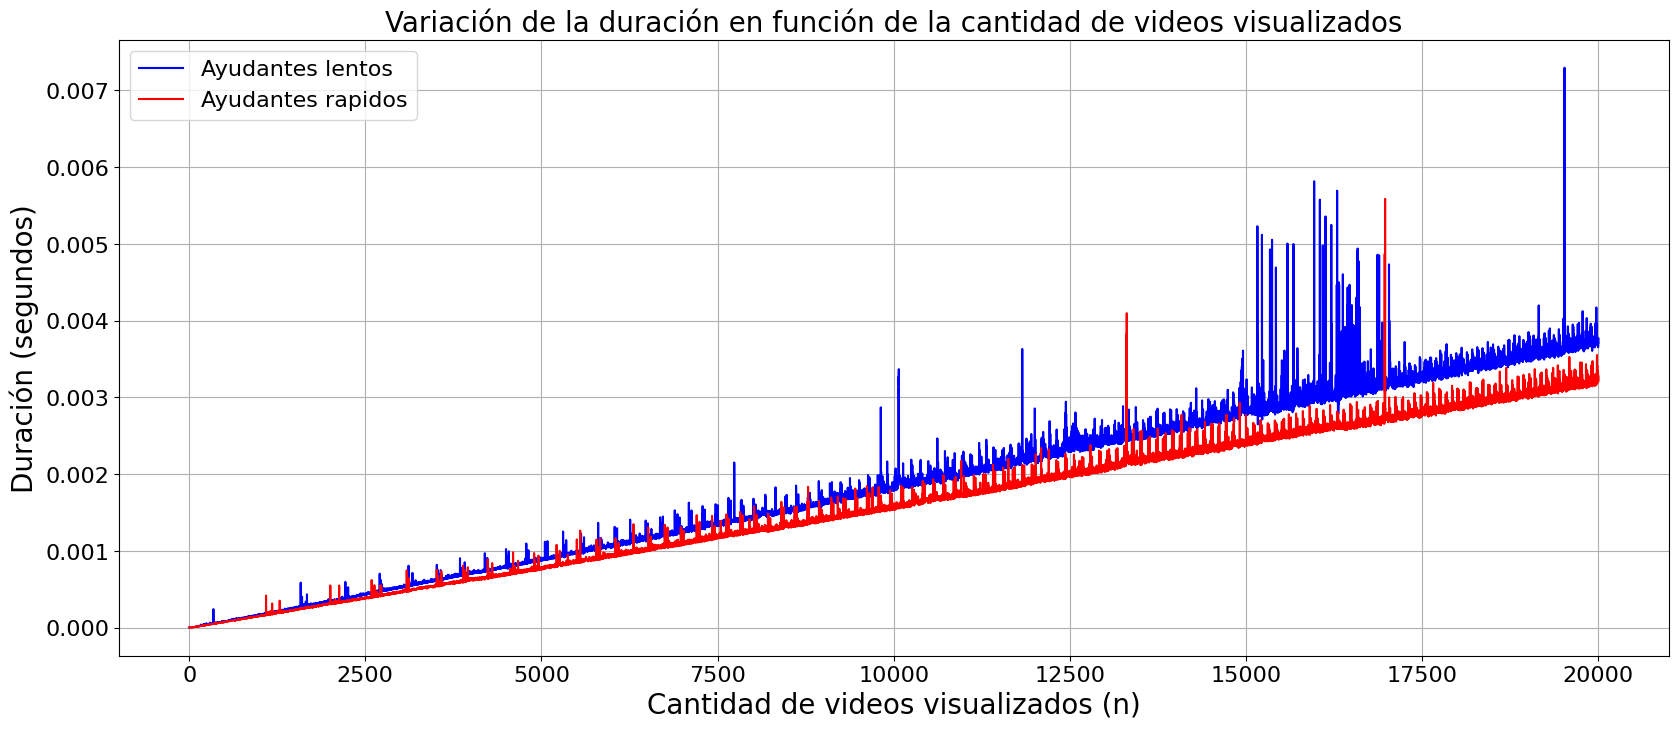

In [14]:
plt.figure(figsize=(20, 8))
# Crear el primer gráfico
plt.plot(tamaños4, duracion4, color='blue', label='Ayudantes lentos')
# Crear el segundo gráfico y superponerlo en el primero
plt.plot(tamaños5, duracion5, color='red', label='Ayudantes rapidos')

plt.xlabel('Cantidad de videos visualizados (n)', fontsize=20)
plt.ylabel('Duración (segundos)', fontsize=20)
plt.title('Variación de la duración en función de la cantidad de videos visualizados', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.grid(True)
plt.show()
